In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Data file
repo_dir = 'C:/Users/Chris/Desktop/COVID-19'
time_series_confirmed = 'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

repo_dir = Path(repo_dir)
time_series_confirmed = repo_dir / Path(time_series_confirmed)

# Load data
df = pd.read_csv(time_series_confirmed)

In [3]:
# Countries to plot
countries = ['Canada', 'US', 'China', 'Italy', 'Spain', 'Germany', 'Iran', 'France', 'Korea, South']

data = {}
for country in countries:
    # Get all rows with the current Country/Region
    rows = df[df['Country/Region'] == country]
    # Get columns with time series data
    time_series = rows.iloc[:, 4:]
    # Sum over provinces/states
    all_country = time_series.sum(axis=0)
    data[country] = all_country


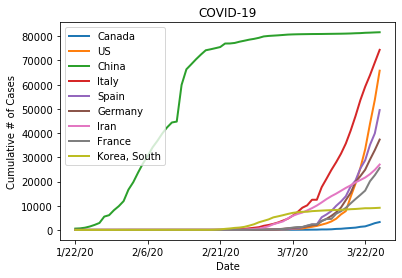

In [4]:
# Plot cumulative number of confirmed cases by country
f, ax = plt.subplots(1, 1)
dates = data[countries[0]].index.tolist()
for country in countries:
    numbers = data[country].tolist()
    ax.plot(dates, numbers, label=country, linewidth=2)

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.legend(loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative # of Cases')
ax.set_title('COVID-19')

f.savefig('cum_num_cases_by_country.png', dpi=200)

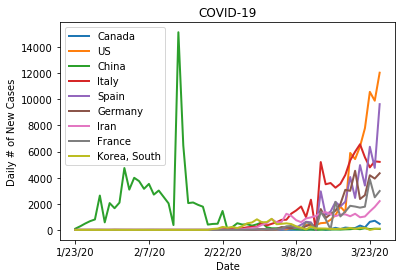

In [5]:
# Plot number of new cases per day by country
f, ax = plt.subplots(1, 1)
dates = data[countries[0]].index.tolist()
dates = dates[1:]
for country in countries:
    numbers = data[country].tolist()
    # Calculate difference from previous day
    numbers = np.diff(numbers)
    ax.plot(dates, numbers, label=country, linewidth=2)

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.legend(loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Daily # of New Cases')
ax.set_title('COVID-19')

f.savefig('daily_num_cases_by_country.png', dpi=200)

In [6]:
# Canada
# Get all rows with the Country/Region as Canada
rows = df[df['Country/Region'] == 'Canada']
# Get columns with time series data
time_series = rows.iloc[:, 4:]


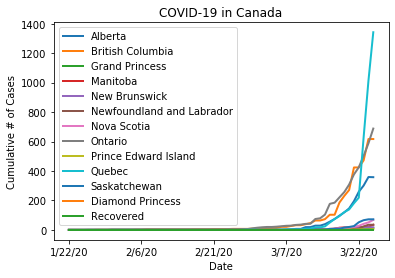

In [7]:
# Plot cumulative number of confirmed cases by province in Canada
f, ax = plt.subplots(1, 1)
dates = data[countries[0]].index.tolist()
provinces = rows['Province/State'].tolist()
for province in provinces:
    numbers = time_series.loc[rows['Province/State'] == province].iloc[0].tolist()
    ax.plot(dates, numbers, label=province, linewidth=2)

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.legend(loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative # of Cases')
ax.set_title('COVID-19 in Canada')

f.savefig('cum_num_cases_in_canada.png', dpi=200)

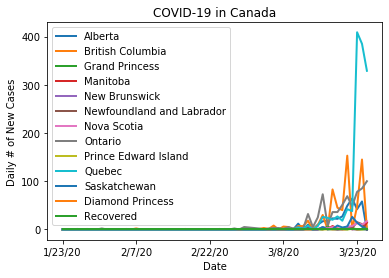

In [8]:
# Plot number of new cases per day in Canada
f, ax = plt.subplots(1, 1)
dates = data[countries[0]].index.tolist()
dates = dates[1:]
provinces = rows['Province/State'].tolist()
for province in provinces:
    numbers = time_series.loc[rows['Province/State'] == province].iloc[0].tolist()
    # Calculate difference from previous day
    numbers = np.diff(numbers)
    ax.plot(dates, numbers, label=province, linewidth=2)

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.legend(loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Daily # of New Cases')
ax.set_title('COVID-19 in Canada')

f.savefig('daily_num_cases_in_canada.png', dpi=200)